In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img_query = cv2.imread('data/box.png', 0)
img_train = cv2.imread('data/box_in_scene.png', 0)

In [2]:
sift = cv2.xfeatures2d_SIFT.create()
kp_query, des_query = sift.detectAndCompute(img_query, None)
kp_train, des_train = sift.detectAndCompute(img_train, None)

In [13]:
des_query.shape

(603, 128)

## 基於 SIFT 特徵的暴力比對

In [3]:
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des_query, des_train, k=2)

In [5]:
candidate = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        candidate.append([m])

In [6]:
img_show = cv2.drawMatchesKnn(img_query, kp_query, img_train, kp_train, candidate, None, flags=2)

In [7]:
cv2.imshow('image', img_show)
cv2.waitKey(0)
cv2.destroyAllWindows()

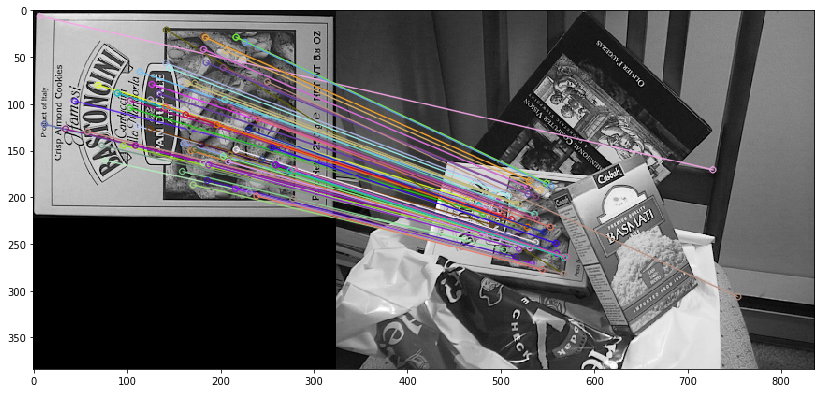

In [9]:
plt.figure(figsize=(14,7))
plt.imshow(img_show[:,:,::-1])